# UNIT4: time series-Time zoning

In [2]:
import pandas as pd
import numpy as np
import scipy.stats

In [3]:
from datetime import datetime
now = datetime.now()
now

datetime.datetime(2022, 11, 1, 9, 19, 21, 439304)

## time series users usually  work with time series using current international standard,  the coordinated universal time (UTC): the successor to Greenwich Mean Time (GMT) 
Local Time zones are expressed as offsets from UTC.
LMT: Local Mean Time: The time, as determined by the Mean Sun, at an observer's local meridian.
GMT: Greenwich Mean Time – The mean solar time of the longitude (0°) of the Royal Greenwich Observatory in England

 using timezones in Python thru the third-party pytz library which exposes the Olson database, a compilation of world
time zone information.

In [4]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [5]:
type(pytz.common_timezones)
l1=pytz.common_timezones

In [6]:
len(l1)

439

## displaying  timezones in Asia

In [7]:
for e in l1:
    if 'Asia' in e:
        print(e)

Asia/Aden
Asia/Almaty
Asia/Amman
Asia/Anadyr
Asia/Aqtau
Asia/Aqtobe
Asia/Ashgabat
Asia/Atyrau
Asia/Baghdad
Asia/Bahrain
Asia/Baku
Asia/Bangkok
Asia/Barnaul
Asia/Beirut
Asia/Bishkek
Asia/Brunei
Asia/Chita
Asia/Choibalsan
Asia/Colombo
Asia/Damascus
Asia/Dhaka
Asia/Dili
Asia/Dubai
Asia/Dushanbe
Asia/Famagusta
Asia/Gaza
Asia/Hebron
Asia/Ho_Chi_Minh
Asia/Hong_Kong
Asia/Hovd
Asia/Irkutsk
Asia/Jakarta
Asia/Jayapura
Asia/Jerusalem
Asia/Kabul
Asia/Kamchatka
Asia/Karachi
Asia/Kathmandu
Asia/Khandyga
Asia/Kolkata
Asia/Krasnoyarsk
Asia/Kuala_Lumpur
Asia/Kuching
Asia/Kuwait
Asia/Macau
Asia/Magadan
Asia/Makassar
Asia/Manila
Asia/Muscat
Asia/Nicosia
Asia/Novokuznetsk
Asia/Novosibirsk
Asia/Omsk
Asia/Oral
Asia/Phnom_Penh
Asia/Pontianak
Asia/Pyongyang
Asia/Qatar
Asia/Qostanay
Asia/Qyzylorda
Asia/Riyadh
Asia/Sakhalin
Asia/Samarkand
Asia/Seoul
Asia/Shanghai
Asia/Singapore
Asia/Srednekolymsk
Asia/Taipei
Asia/Tashkent
Asia/Tbilisi
Asia/Tehran
Asia/Thimphu
Asia/Tokyo
Asia/Tomsk
Asia/Ulaanbaatar
Asia/Urumqi
A

In [8]:
pytz.timezone('Asia/Kolkata')  #standard time

<DstTzInfo 'Asia/Kolkata' LMT+5:53:00 STD>

## Creating a time series doesnot assiciate it with a time zone by default 

In [9]:
rng = pd.date_range(now, periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2022-11-01 09:19:21.439304    1.013791
2022-11-02 09:19:21.439304   -1.533723
2022-11-03 09:19:21.439304    1.305658
2022-11-04 09:19:21.439304   -0.274982
2022-11-05 09:19:21.439304    0.316148
2022-11-06 09:19:21.439304   -1.683528
Freq: D, dtype: float64

In [10]:
ts.index.tz

In [11]:
rng = pd.date_range(datetime.today().date(), periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2022-11-01    1.636166
2022-11-02    0.811623
2022-11-03   -0.658990
2022-11-04    0.405334
2022-11-05   -0.605987
2022-11-06    1.007521
Freq: D, dtype: float64

In [12]:
print(rng.tz)

None


## Explicitly associate a zone with a timeseries

In [13]:
rng = pd.date_range(now, periods=6, freq='D',tz='UTC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts.index.tz

<UTC>

# Periods and Period Arithmetic
Periods represent timespans, like days, months, quarters, or years. 
The Period class represents this data type, requiring a string or integer and a frequency from frequency table

In [15]:
p1 = pd.Period(2021, freq='A-JUL')
p1

Period('2021', 'A-JUL')

## p1 period object represents full year from 1 August,2020-31 July 2021. addition/subtraction.shifting as per mentioned frequency

In [16]:
p1+5

Period('2026', 'A-JUL')

In [17]:
p1-4

Period('2017', 'A-JUL')

In [18]:
p2 = pd.Period(2023, freq='A-JUL')
p2-p1

<2 * YearEnds: month=7>

In [19]:
d1=pd.Period(2023, freq='D')
d1

Period('2023-01-01', 'D')

In [20]:
d1-1

Period('2022-12-31', 'D')

## generating a specific periodindex

In [21]:
values=['2001','2002','2003']
index = pd.PeriodIndex(values, freq='A-DEC')
index.values


array([Period('2001', 'A-DEC'), Period('2002', 'A-DEC'),
       Period('2003', 'A-DEC')], dtype=object)

## Period Frequency Conversion

## A-Jul freq within period: 1-Aug-2020 to 31-July-2021

In [22]:
p2 = pd.Period(2021, freq='A-JUL')
print(p2.strftime('%d-%m-%Y'))
p3=p2+1
print(p3.strftime('%d-%m-%Y'))


31-07-2021
31-07-2022


# setting freq, of period to the end of that period

In [23]:
p3=p2.asfreq('D', how='start')
p4=p2.asfreq('M', how='begin')
print(p3.strftime('%d-%m-%Y'))
print(p4.strftime('%d-%m-%Y'))

01-08-2020
31-08-2020


In [24]:
p3 = pd.Period('10-2022', 'M')

In [25]:
p3.strftime('%A,%d %B %Y')

'Monday,31 October 2022'

In [27]:
p3.asfreq('D', how='start')

Period('2022-10-01', 'D')

In [28]:
p3.asfreq('D', how='end')

Period('2022-10-31', 'D')

## when converting from high freq ('Days') to low freq ('year'), then do remember the period. 
* period can be used for index

In [29]:
p = pd.Period('Aug-2007', 'M')
p4=p.asfreq('A-Dec',how='end')
p4

Period('2007', 'A-DEC')

In [30]:
p4.asfreq('M', how='start')

Period('2007-01', 'M')

In [31]:
p5=p4.asfreq('M', how='end')
p5.strftime('%A,%d %B %Y')

'Monday,31 December 2007'

In [28]:
p5=p4.asfreq('M', how='start')
p5.strftime('%A,%d %B %Y')

'Wednesday,31 January 2007'

## aug-Dec: same year, Jan-July: next yr, cycle. low freq to high freq

In [29]:
p

Period('2007-08', 'M')

In [30]:
p.asfreq('D',how='start')

Period('2007-08-01', 'D')

In [31]:
p5=p.asfreq('A-Jan')
p5

Period('2008', 'A-JAN')

In [32]:
p5.asfreq('D',how='start')

Period('2007-02-01', 'D')

In [33]:
p5.asfreq('D',how='end')

Period('2008-01-31', 'D')

## Resampling and Frequency Conversion: 
* Resampling is  the process of converting a time series from one frequency to another. 
* downsampling: Aggregating higher frequency data to lower frequency 
* UPsampling:  Converting lower frequency to higher frequency 
* Not all resampling falls into either of these categoriese: e.g.  converting W-WED (weekly on Wednesday) to W-FRI is neither upsampling nor downsampling.
* Resample has a similar API to groupby and is used to  group the data for subsequent aggregation

# generate a data series to have record of number of students attending college per day for 150 days ahead starting from 21 july 2021

In [32]:
import random

In [33]:
rng = pd.date_range('2021-07-21', periods=150, freq='D')
rng

DatetimeIndex(['2021-07-21', '2021-07-22', '2021-07-23', '2021-07-24',
               '2021-07-25', '2021-07-26', '2021-07-27', '2021-07-28',
               '2021-07-29', '2021-07-30',
               ...
               '2021-12-08', '2021-12-09', '2021-12-10', '2021-12-11',
               '2021-12-12', '2021-12-13', '2021-12-14', '2021-12-15',
               '2021-12-16', '2021-12-17'],
              dtype='datetime64[ns]', length=150, freq='D')

## using sample() which generteas specified number from the given range

In [34]:
random.sample(range(1000), 50)[0:10]

[722, 992, 119, 37, 334, 657, 744, 300, 152, 762]

In [35]:
ts = pd.Series(random.sample(range(len(rng)*2), len(rng)), index=rng)
ts

2021-07-21    285
2021-07-22    118
2021-07-23     20
2021-07-24    209
2021-07-25    137
             ... 
2021-12-13    230
2021-12-14    189
2021-12-15     74
2021-12-16    104
2021-12-17     26
Freq: D, Length: 150, dtype: int64

## total/max/min attendees per month

In [36]:
ts.resample('M').sum()

2021-07-31    1621
2021-08-31    4583
2021-09-30    4412
2021-10-31    4656
2021-11-30    4144
2021-12-31    2764
Freq: M, dtype: int64

In [37]:
ts.resample('M').max()

2021-07-31    299
2021-08-31    293
2021-09-30    295
2021-10-31    286
2021-11-30    291
2021-12-31    298
Freq: M, dtype: int64

In [38]:
ts.resample('M').count()

2021-07-31    11
2021-08-31    31
2021-09-30    30
2021-10-31    31
2021-11-30    30
2021-12-31    17
Freq: M, dtype: int64

In [43]:
ts.resample('M').mean()

2021-07-31    159.636364
2021-08-31    131.000000
2021-09-30    148.466667
2021-10-31    142.354839
2021-11-30    153.666667
2021-12-31    140.705882
Freq: M, dtype: float64

## result same as that of mean() as above with difference in periodicity)

In [39]:
ts.resample('M', kind='period').mean()

2021-07    147.363636
2021-08    147.838710
2021-09    147.066667
2021-10    150.193548
2021-11    138.133333
2021-12    162.588235
Freq: M, dtype: float64

### Downsampling: Aggregating data to a regular, lower frequency.  The data need to be aggregated doesn’t need to be of fixed frequency;
* the desired frequency defines bin edges that are used to slice the time series into pieces to aggregate. Two points to note:
* i)  Which side of each interval is closed
* ii) How to label each aggregated bin, either with the start of the interval or the end

In [40]:
rng = pd.date_range('2000-01-01', periods=12, freq='h')
ts = pd.Series(np.arange(1,13), index=rng)
ts

2000-01-01 00:00:00     1
2000-01-01 01:00:00     2
2000-01-01 02:00:00     3
2000-01-01 03:00:00     4
2000-01-01 04:00:00     5
2000-01-01 05:00:00     6
2000-01-01 06:00:00     7
2000-01-01 07:00:00     8
2000-01-01 08:00:00     9
2000-01-01 09:00:00    10
2000-01-01 10:00:00    11
2000-01-01 11:00:00    12
Freq: H, dtype: int32

## freq is exact multiple of periods

In [41]:
ts.resample('3h', closed='right').sum()

1999-12-31 21:00:00     1
2000-01-01 00:00:00     9
2000-01-01 03:00:00    18
2000-01-01 06:00:00    27
2000-01-01 09:00:00    23
Freq: 3H, dtype: int32

In [42]:
ts.resample('4h', closed='left').sum()

2000-01-01 00:00:00    10
2000-01-01 04:00:00    26
2000-01-01 08:00:00    42
Freq: 4H, dtype: int32

## freq is not exact multiple of periods

In [43]:
ts.resample('5h', closed='right').sum()

1999-12-31 19:00:00     1
2000-01-01 00:00:00    20
2000-01-01 05:00:00    45
2000-01-01 10:00:00    12
Freq: 5H, dtype: int32

In [59]:
ts.resample('5h', closed='left').sum()

2000-01-01 00:00:00    15
2000-01-01 05:00:00    40
2000-01-01 10:00:00    23
Freq: 5H, dtype: int32

In [44]:
dft=ts.resample('3h', closed='right',
            label='right',loffset="-1min").sum()
dft
       

C:\Users\SHARAN~1\AppData\Local\Temp/ipykernel_4596/800714931.py:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  dft=ts.resample('3h', closed='right',


1999-12-31 23:59:00     1
2000-01-01 02:59:00     9
2000-01-01 05:59:00    18
2000-01-01 08:59:00    27
2000-01-01 11:59:00    23
Freq: 3H, dtype: int32

### Alternative to former loffset():  Open-High-Low-Close (OHLC) resampling

In [45]:
from pandas.tseries.frequencies import to_offset
from datetime import datetime

In [46]:
dft=ts.resample('3h', closed='right',label='right').sum()
dft.index = dft.index + to_offset("1min")  
dft

2000-01-01 00:01:00     1
2000-01-01 03:01:00     9
2000-01-01 06:01:00    18
2000-01-01 09:01:00    27
2000-01-01 12:01:00    23
Freq: 3H, dtype: int32

In [49]:
ts

2000-01-01 00:00:00     1
2000-01-01 01:00:00     2
2000-01-01 02:00:00     3
2000-01-01 03:00:00     4
2000-01-01 04:00:00     5
2000-01-01 05:00:00     6
2000-01-01 06:00:00     7
2000-01-01 07:00:00     8
2000-01-01 08:00:00     9
2000-01-01 09:00:00    10
2000-01-01 10:00:00    11
2000-01-01 11:00:00    12
Freq: H, dtype: int32

## another example

In [64]:
dft=ts.resample('5min', closed='right',
            label='right',loffset="-1s").sum()
dft

C:\Users\SHARAN~1\AppData\Local\Temp/ipykernel_11204/2727996476.py:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  dft=ts.resample('5min', closed='right',


1999-12-31 23:59:59     1
2000-01-01 00:04:59     0
2000-01-01 00:09:59     0
2000-01-01 00:14:59     0
2000-01-01 00:19:59     0
                       ..
2000-01-01 10:39:59     0
2000-01-01 10:44:59     0
2000-01-01 10:49:59     0
2000-01-01 10:54:59     0
2000-01-01 10:59:59    12
Freq: 5T, Length: 133, dtype: int32

## ohlc: to get the first (open), last (close), maximum (high), and minimal (low) values for each bucket

In [48]:
ts.resample('3h').ohlc()

,open,high,low,close
2000-01-01 00:00:00,1,3,1,3
2000-01-01 03:00:00,4,6,4,6
2000-01-01 06:00:00,7,9,7,9
2000-01-01 09:00:00,10,12,10,12


## Upsampling: converting from a low frequency (week/month) to a higher frequency (day/week), no aggregation is needed. rows with gaps time periods will be filled with NaN. To avoid large NaN, ffill() or bfill() may be used

In [50]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('16/10/2021', periods=2,freq='W-Mon'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2021-10-18,0.405771,0.195659,0.490880,-0.735457
2021-10-25,0.698615,1.266147,0.870027,0.058263


In [51]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2021-10-18,0.405771,0.195659,0.490880,-0.735457
2021-10-19,NaN,NaN,NaN,NaN
2021-10-20,NaN,NaN,NaN,NaN
2021-10-21,NaN,NaN,NaN,NaN
2021-10-22,NaN,NaN,NaN,NaN
2021-10-23,NaN,NaN,NaN,NaN
2021-10-24,NaN,NaN,NaN,NaN
2021-10-25,0.698615,1.266147,0.870027,0.058263


In [52]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2021-10-18,0.405771,0.195659,0.490880,-0.735457
2021-10-19,0.405771,0.195659,0.490880,-0.735457
2021-10-20,0.405771,0.195659,0.490880,-0.735457
2021-10-21,0.405771,0.195659,0.490880,-0.735457
2021-10-22,0.405771,0.195659,0.490880,-0.735457
2021-10-23,0.405771,0.195659,0.490880,-0.735457
2021-10-24,0.405771,0.195659,0.490880,-0.735457
2021-10-25,0.698615,1.266147,0.870027,0.058263


In [53]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2021-10-18,0.405771,0.195659,0.490880,-0.735457
2021-10-19,0.405771,0.195659,0.490880,-0.735457
2021-10-20,0.405771,0.195659,0.490880,-0.735457
2021-10-21,NaN,NaN,NaN,NaN
2021-10-22,NaN,NaN,NaN,NaN
2021-10-23,NaN,NaN,NaN,NaN
2021-10-24,NaN,NaN,NaN,NaN
2021-10-25,0.698615,1.266147,0.870027,0.058263


In [54]:
frame.resample('D').bfill(limit=3)

,Colorado,Texas,New York,Ohio
2021-10-18,0.405771,0.195659,0.490880,-0.735457
2021-10-19,NaN,NaN,NaN,NaN
2021-10-20,NaN,NaN,NaN,NaN
2021-10-21,NaN,NaN,NaN,NaN
2021-10-22,0.698615,1.266147,0.870027,0.058263
2021-10-23,0.698615,1.266147,0.870027,0.058263
2021-10-24,0.698615,1.266147,0.870027,0.058263
2021-10-25,0.698615,1.266147,0.870027,0.058263


In [55]:
frame.resample('W-Tue').ffill()

,Colorado,Texas,New York,Ohio
2021-10-19,0.405771,0.195659,0.490880,-0.735457
2021-10-26,0.698615,1.266147,0.870027,0.058263


In [41]:
frame

,Colorado,Texas,New York,Ohio
2021-10-18,-0.512387,0.271481,0.274529,0.106444
2021-10-25,0.194239,-0.172833,-0.516908,-1.020411


In [43]:
frame.resample('W-Sun').ffill()

,Colorado,Texas,New York,Ohio
2021-10-24,-0.512387,0.271481,0.274529,0.106444
2021-10-31,0.194239,-0.172833,-0.516908,-1.020411


In [42]:
frame.resample('W-Sun').bfill()

,Colorado,Texas,New York,Ohio
2021-10-24,0.194239,-0.172833,-0.516908,-1.020411
2021-10-31,NaN,NaN,NaN,NaN


## Resampling with Periods

In [56]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2021', '12-2022',freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame


,Colorado,Texas,New York,Ohio
2021-01,-0.145330,-0.891460,-0.303987,-2.619531
2021-02,0.987056,0.088570,0.717840,0.275150
2021-03,0.084480,0.668323,0.423208,-0.590653
2021-04,1.656180,0.219893,-0.115180,0.083381
2021-05,-0.328155,0.908593,-0.607106,-0.846767
2021-06,-0.910181,-0.690248,-1.110677,-0.306621
2021-07,1.198064,-1.013530,-0.949245,-0.467728
2021-08,-1.331011,-0.778365,-0.260554,-1.596551
2021-09,1.945219,-1.697326,0.188947,-0.213835
2021-10,0.488216,-0.453688,0.100917,-0.844645


In [57]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2021,0.414277,-0.427008,-0.163451,-0.641624
2022,0.182105,0.021590,-0.042231,-0.361369


## Q-DEC: Quarterly, year ending in December

In [76]:
annual_frame.resample('Q-Dec').mean()

,Colorado,Texas,New York,Ohio
2021Q1,0.198175,-0.14941,-0.143816,-0.476974
2021Q2,NaN,NaN,NaN,NaN
2021Q3,NaN,NaN,NaN,NaN
2021Q4,NaN,NaN,NaN,NaN
2022Q1,-0.378516,-0.59600,-0.251005,0.010059
2022Q2,NaN,NaN,NaN,NaN
2022Q3,NaN,NaN,NaN,NaN
2022Q4,NaN,NaN,NaN,NaN


## cannot be resampled for sub/super period for aggregation: error IncompatibleFrequency

In [77]:
annual_frame.resample('Q-Oct').ffill()

,Colorado,Texas,New York,Ohio
2021Q1,0.198175,-0.14941,-0.143816,-0.476974
2021Q2,0.198175,-0.14941,-0.143816,-0.476974
2021Q3,0.198175,-0.14941,-0.143816,-0.476974
2021Q4,0.198175,-0.14941,-0.143816,-0.476974
2022Q1,-0.378516,-0.59600,-0.251005,0.010059
2022Q2,-0.378516,-0.59600,-0.251005,0.010059
2022Q3,-0.378516,-0.59600,-0.251005,0.010059
2022Q4,-0.378516,-0.59600,-0.251005,0.010059
2023Q1,-0.378516,-0.59600,-0.251005,0.010059


In [78]:
annual_frame.resample('M').mean()

,Colorado,Texas,New York,Ohio
2021-01,0.198175,-0.14941,-0.143816,-0.476974
2021-02,NaN,NaN,NaN,NaN
2021-03,NaN,NaN,NaN,NaN
2021-04,NaN,NaN,NaN,NaN
2021-05,NaN,NaN,NaN,NaN
2021-06,NaN,NaN,NaN,NaN
2021-07,NaN,NaN,NaN,NaN
2021-08,NaN,NaN,NaN,NaN
2021-09,NaN,NaN,NaN,NaN
2021-10,NaN,NaN,NaN,NaN


In [79]:

annual_frame.resample('Q-DEC').ffill()


,Colorado,Texas,New York,Ohio
2021Q1,0.198175,-0.14941,-0.143816,-0.476974
2021Q2,0.198175,-0.14941,-0.143816,-0.476974
2021Q3,0.198175,-0.14941,-0.143816,-0.476974
2021Q4,0.198175,-0.14941,-0.143816,-0.476974
2022Q1,-0.378516,-0.59600,-0.251005,0.010059
2022Q2,-0.378516,-0.59600,-0.251005,0.010059
2022Q3,-0.378516,-0.59600,-0.251005,0.010059
2022Q4,-0.378516,-0.59600,-0.251005,0.010059


In [55]:
annual_frame

,Colorado,Texas,New York,Ohio
2021,0.195064,-0.423791,0.341613,0.095205
2022,-0.306922,-0.025448,-0.083987,0.305228


In [80]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2021Q4,0.198175,-0.14941,-0.143816,-0.476974
2022Q1,0.198175,-0.14941,-0.143816,-0.476974
2022Q2,0.198175,-0.14941,-0.143816,-0.476974
2022Q3,0.198175,-0.14941,-0.143816,-0.476974
2022Q4,-0.378516,-0.59600,-0.251005,0.010059


In [56]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2021Q4,0.195064,-0.423791,0.341613,0.095205
2022Q1,0.195064,-0.423791,0.341613,0.095205
2022Q2,0.195064,-0.423791,0.341613,0.095205
2022Q3,0.195064,-0.423791,0.341613,0.095205
2022Q4,-0.306922,-0.025448,-0.083987,0.305228
2023Q1,-0.306922,-0.025448,-0.083987,0.305228
2023Q2,-0.306922,-0.025448,-0.083987,0.305228
2023Q3,-0.306922,-0.025448,-0.083987,0.305228


# Moving Window Functions

## getting data for each business day 'B'

In [58]:
close_px_all = pd.read_csv('stock_px_2.csv',
                           parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


## Business day: B

In [59]:
close_px = close_px.resample('B').ffill()
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


## plotting stock data

In [60]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))

## the rolling operator: behaves similarly to resample and groupby.
 It can be called on a Series or DataFrame along with a window

## To get  250-day moving window average of Apple’s stock price along with plot of available tics for daily data


<AxesSubplot:>

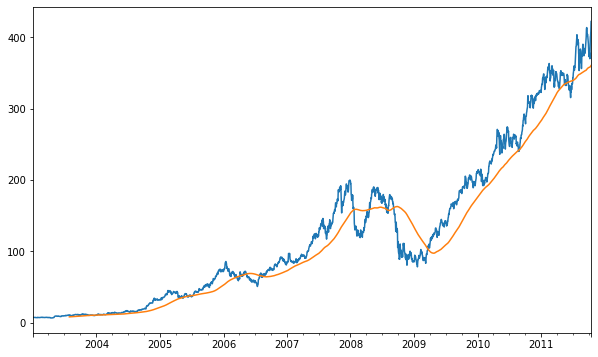

In [62]:
close_px.AAPL.plot()
close_px.AAPL.rolling(150).mean().plot()

In [90]:
plt.figure()

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

## By default rolling functions require all of the values in the window to be non-NA. But in beginning of time series may have Na values. To handle this, use min_periods for missing data

In [91]:
close_px.AAPL

2003-01-02      7.40
2003-01-03      7.45
2003-01-06      7.45
2003-01-07      7.43
2003-01-08      7.28
               ...  
2011-10-10    388.81
2011-10-11    400.29
2011-10-12    402.19
2011-10-13    408.43
2011-10-14    422.00
Name: AAPL, Length: 2214, dtype: float64

In [63]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[0:11]


2003-01-02         NaN
2003-01-03         NaN
2003-01-06         NaN
2003-01-07         NaN
2003-01-08         NaN
2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
Freq: B, Name: AAPL, dtype: float64

<AxesSubplot:>

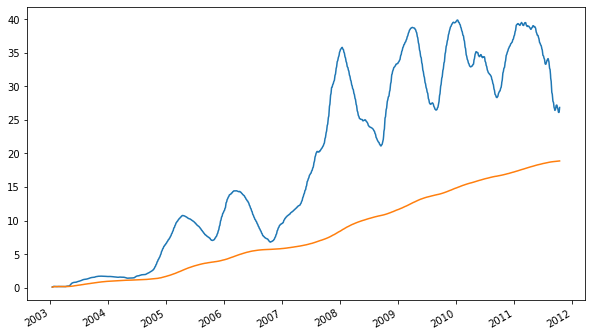

In [98]:
appl_std250.plot()
expanding_mean.plot()

## expanding: The expanding mean starts the time window from the beginning of the time series and increases the size of the window until it encompasses the whole series.

In [64]:
expanding_mean = appl_std250.expanding().mean()
expanding_mean

2003-01-02          NaN
2003-01-03          NaN
2003-01-06          NaN
2003-01-07          NaN
2003-01-08          NaN
                ...    
2011-10-10    18.521201
2011-10-11    18.524272
2011-10-12    18.527385
2011-10-13    18.530554
2011-10-14    18.533823
Freq: B, Name: AAPL, Length: 2292, dtype: float64

<AxesSubplot:>

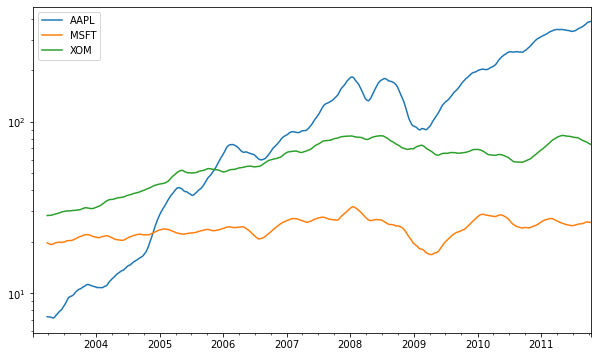

In [65]:
close_px.rolling(60).mean().plot(logy=True)